# Linear Support Vector Machines: 3D feature space

A support vector machine (SVM) is a non-probabilistic supervised machine learning model that uses classification algorithms for two-group classification problems. The non-probabilistic aspect is its key strength, in contrast with a probabilistic classifier, such as The Naive Bayes. In essence, an SVM separates data across decision boundaries, determined by only a small subset of the feature vectors (data or ponts in the feature space). The data subset that supports the decision boundary are called support vectors. The decision boundaries are found by determining a hyperplane placed in the middle of the decision boundaries.

Using the linearSVM library a binary classification model involving 3 features was created. The feature space is in 3D, thus the generated hyperplane, which separates the two classes, is a 2-Dimensional plane.


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df_iris=pd.read_csv('../input/iris/Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


We will discriminate between Iris Setosa and Iris Versicolor using 3 features: Sepal Length, Sepal width and petal length.

Text(0.5, 0, 'Petal Length (cm)')

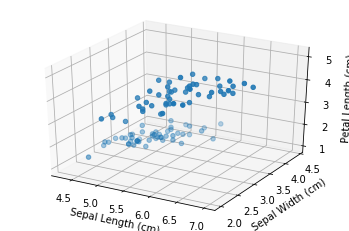

In [3]:
df=df_iris.iloc[:100,1:4]

ax = plt.axes(projection='3d')
ax.scatter(df['SepalLengthCm'], df['SepalWidthCm'], df['PetalLengthCm'])
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')


Features and labels

In [4]:
# The support vector machines in scikit-learn support both dense (numpy.ndarray and convertible to that by numpy.asarray)
X=df.to_numpy()

# Converting string value to int type for labels: Setosa = 0, Versicolor = 1
y=df_iris.iloc[:100,-1]
y = LabelEncoder().fit_transform(y)



Splitting of the dataset and raining the model

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

svc = LinearSVC()
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

## Visualization of the hyperplane

The following generates a plot of the vectors from X_train, and the SVM hyperplane.

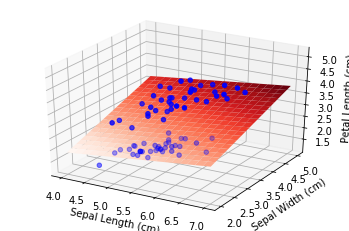

In [6]:
plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c='b')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')

zz = lambda xx,yy: (-svc.intercept_[0]-svc.coef_[0][0]*xx-svc.coef_[0][1]*yy) / svc.coef_[0][2]
tmpx = np.linspace(4, 7, 20)
tmpy = np.linspace(2, 5, 20)
xx,yy = np.meshgrid(tmpx,tmpy)
ax.plot_surface(xx, yy, zz(xx,yy), cmap='Reds')

The hyperplane shown from another angle:

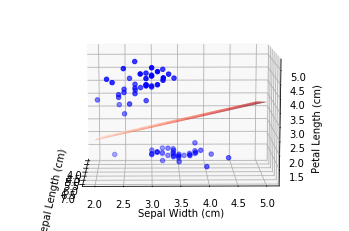

In [7]:
plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c='b')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')

zz = lambda xx,yy: (-svc.intercept_[0]-svc.coef_[0][0]*xx-svc.coef_[0][1]*yy) / svc.coef_[0][2]
tmpx = np.linspace(4, 7, 20)
tmpy = np.linspace(2, 5, 20)
xx,yy = np.meshgrid(tmpx,tmpy)
ax.plot_surface(xx, yy, zz(xx,yy), cmap='Reds')
for ii in range(0,360,1):
    ax.view_init(elev=10., azim=ii)

And from  another angle

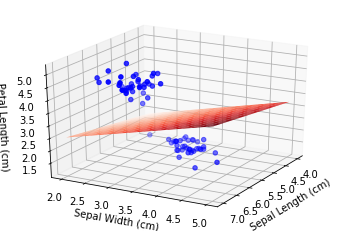

In [8]:
plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c='b')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')

zz = lambda xx,yy: (-svc.intercept_[0]-svc.coef_[0][0]*xx-svc.coef_[0][1]*yy) / svc.coef_[0][2]
tmpx = np.linspace(4, 7, 20)
tmpy = np.linspace(2, 5, 20)
xx,yy = np.meshgrid(tmpx,tmpy)
ax.plot_surface(xx, yy, zz(xx,yy), cmap='Reds')
for ii in range(0,30,1):
    ax.view_init(elev=25, azim=ii)

Finally, its Confusion Matrix:

In [9]:
y_pred = svc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[13,  0],
       [ 0, 12]])